# Goal

We want to use pythons **odeint** to simulate a falling ball. We expect somthing like:

![image.png](http://4.bp.blogspot.com/-vMy1wLZdhak/U2dun1jtEMI/AAAAAAAABpA/nO71jDyrda8/s1600/ball+falling+from+cliff.gif)

*src: [http://4.bp.blogspot.com](http://4.bp.blogspot.com/-vMy1wLZdhak/U2dun1jtEMI/AAAAAAAABpA/nO71jDyrda8/s1600/ball+falling+from+cliff.gif)*

The ball follows the second order differential equation with position y, time t and constant k

\begin{equation*}
\frac{d^2y}{dt^2} = ky
\end{equation*}





In [5]:
from scipy.integrate import odeint
?odeint

# What does odeint do?

-> Integrate a system of ordinary differential equations.

to use the function you need at least:

* one function to integrate
* initial state
* time vector

## let's start simpler
(with a first order differential equation)

how to simulate a cooling cup of tea?

![hot tea](http://maxpixel.freegreatpicture.com/static/photo/1x/Hot-Steam-Teacup-Cup-Of-Tea-Tee-Drink-2324842.jpg)
*src: [http://maxpixel.freegreatpicture.com/](http://maxpixel.freegreatpicture.com/static/photo/1x/Hot-Steam-Teacup-Cup-Of-Tea-Tee-Drink-2324842.jpg)*

Here we have a differential equation of first order with temperature **T**, time **t** and constant **k**:

\begin{equation*}
\frac{dT}{dt} = kT
\end{equation*}

## What does this differential equation mean?

$\frac{dT}{dt}$ is the change of temperature **dT** over change of time **dt** which is proportional to the actual temperature **T**. A hot cup will cool faster than a cool cup.


Depending on the cup **k** will be different, but let's assume 
\begin{equation*}
k = - \frac{1}{5min}
\end{equation*}

The cup can't be cooler than the room temperature $T_{Room} = 20^o C$, which means:

\begin{equation*}
\frac{dT}{dt} = k (T - T_{Room})\
\end{equation*}

To use **odeint** you have to solve the equation for **dT**:

\begin{equation*}
dT = k (T - T_{Room}) { dt}\
\end{equation*}


In [6]:
# defining the differential equation:
def cooling_cup(T, t):
    k = -1/5
    T_room = 20
    dT = k * (T - T_room)
    return dT

In [7]:
import numpy as np
t = np.arange(0., 20., .5)
T0 = 90

T = odeint(cooling_cup, T0, t)

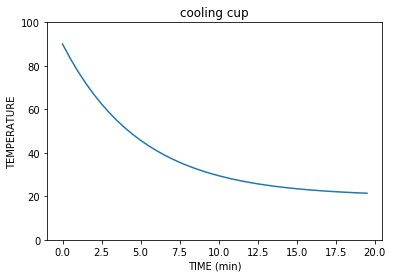

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(t, T)
plt.xlabel('TIME (min)')
plt.ylabel('TEMPERATURE')
plt.ylim([0,100])
plt.title('cooling cup')

# second order differential equation

Now we are ready for a second order differential equation, like:

**accelaration changes velocity:**
\begin{align}
\frac{dv}{dt} = g = -9.81 \frac{m}{s^2} 
\end{align}

\begin{align}
(= \frac{d^2 y}{dt^2})
\end{align}


The velocity changes with time, because the ball is pulled by gravity towards ground.

**velocity changes position:**
\begin{align}
\frac{dy}{dt} = v
\end{align}


So we have to processes, which change the state of our system:
* the gravity (acceleration) changes the velocity:
\begin{align}
dv = g \cdot dt 
\end{align}
* the velocity changes the position
\begin{align}
dy = v \cdot dt 
\end{align}


In [9]:
# state is a vector: (position y, velocity v)

def dt_state(state,dt):
    "ball's position and velocity changed by acceleration g"
    g = -9.81
    y, v = state
    dy = v
    dv = g
    return dy, dv

In [10]:
y0 = 100
v0 = 0
state0 = y0, v0
t = np.arange(0., 8., .1)

In [11]:
state = odeint(dt_state, state0, t)
y = state[:,0]
v = state[:,1]

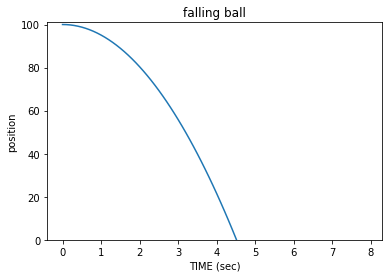

In [12]:
plt.plot(t, y)
plt.xlabel('TIME (sec)')
plt.ylabel('position')
plt.ylim([0,101])
plt.title('falling ball')

# let's try different initial state

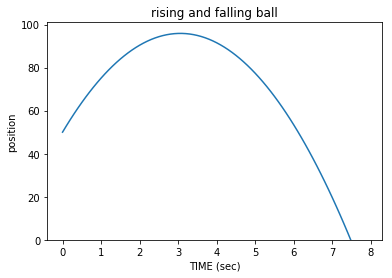

In [13]:
y0 = 50
v0 = 30 # m / s
state0 = y0, v0
state = odeint(dt_state, state0, t)
y = state[:,0]
plt.plot(t, y)
plt.xlabel('TIME (sec)')
plt.ylabel('position')
plt.ylim([0,101])
plt.title('rising and falling ball')

# create a simulation

My goal was here to gain some experience in object orientated programming:
I wanted to have a **class box** and a **class ball** within the box which inherites from the **box**

In [14]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle
from matplotlib import animation

class Box:

    def __init__(self,
                 gravity=-9.81,
                 boarder_left=0,
                 boarder_bottom=0,
                 boarder_right=10,
                 boarder_top=10
                 ):
        self.gravity = gravity
        self.boarder_top = boarder_top
        self.boarder_right = boarder_right
        self.boarder_bottom = boarder_bottom
        self.boarder_left = boarder_left

    def plot_box(self):

        fig = plt.figure()
        ax = plt.subplot(
            xlim = (self.boarder_left -1, self.boarder_right + 1),
            ylim = (self.boarder_bottom - 1, self.boarder_top + 1)
        )
        ax.plot([self.boarder_left, self.boarder_left], [self.boarder_bottom + 0.001, self.boarder_top],'k')
        ax.plot([self.boarder_right, self.boarder_right], [self.boarder_bottom + 0.001, self.boarder_top],'k')
        ax.plot([self.boarder_left, self.boarder_right], [self.boarder_bottom, self.boarder_bottom],'k')
        ax.plot([self.boarder_left, self.boarder_right], [self.boarder_top, self.boarder_top],'k')
        return fig, ax

class Ball(Box):

    # mass = 1 # kg
    # radius = 1 # m
    # gravity = -9.81  # m / s**2

    def __init__(self,
                 X0 = 2., # m
                 Y0 = 2., # m
                 VX0 = 0, # m/s
                 VY0 = 1, # m/s
                 radius = 1,
                 gravity= -9.81,  # m
                 boarder_left=0,
                 boarder_bottom=0,
                 boarder_right=10,
                 boarder_top=10
                 ):
        self.position_y = Y0
        self.position_x = X0
        self.velocity_y = VY0
        self.velocity_x = VX0
        self.radius = radius
        Box.__init__(self,gravity,boarder_left,boarder_bottom,boarder_right,boarder_top)

        self.state_y = self.position_y, self.velocity_y
        self.state_x = self.position_x, self.velocity_x
        self.time_elapsed = 0

        if self.position_x - self.radius < self.boarder_left:
            raise ValueError('The ball seems to be placed too far left: %s - %s > %s' % (self.position_x,self.radius, self.boarder_left))

    def dt_state(self,state,dt,a):
        "steps a particle's position and velocity subject to acceleration a"
        y, dy = state
        ddy = a
        return dy, ddy

    def hit_wall(self):
        if self.position_x - self.radius < self.boarder_left:
            self.velocity_x = -self.velocity_x
            self.state_x = self.position_x, self.velocity_x
        if self.position_x + self.radius > self.boarder_right:
            self.velocity_x = -self.velocity_x
            self.state_x = self.position_x, self.velocity_x
        if self.position_y - self.radius < self.boarder_bottom:
            self.velocity_y = -self.velocity_y
            self.state_y = self.position_y, self.velocity_y
        if self.position_y + self.radius > self.boarder_top:
            self.velocity_y = -self.velocity_y
            self.state_y = self.position_y, self.velocity_y

    def step(self, dt):
        """execute one time step of length dt and update state"""
        self.state_y = odeint(self.dt_state, self.state_y, [0,dt] , args=(self.gravity,))[1]
        self.state_x = odeint(self.dt_state, self.state_x, [0, dt], args=(0,))[1]
        self.position_y, self.velocity_y = self.state_y
        self.position_x, self.velocity_x = self.state_x
        self.time_elapsed += dt
        self.hit_wall()




Using matplotlib backend: Qt5Agg


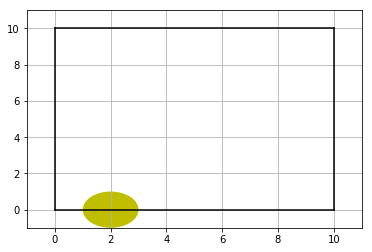

In [15]:
%matplotlib
ball = Ball(5,5,5,0,1)
dt = 1/30
time_elapsed = [0]
fig, ax = ball.plot_box()
ax.grid()

patch = Circle((5, -5), ball.radius, fc='y')

def init():
    patch.center = (2, 0)
    ax.add_patch(patch)
    return patch,

def animate(i):
    global ball, dt, time_elapsed
    ball.step(dt)
    time_elapsed.append(ball.time_elapsed)

    x = ball.position_x
    y = ball.position_y
    patch.center = (x, y)
    return patch,


ani = animation.FuncAnimation(fig, animate, frames=200,interval=100, blit=True, init_func=init)


In [16]:
from IPython.display import HTML
HTML(ani.to_html5_video())